# Decision Tree

## 1. Import data

In [1]:
# Disable warning
import warnings
warnings.filterwarnings('ignore')
import pandas as pd, numpy as np

In [2]:
# Importing all datasets
df_smoke = pd.read_csv("smoke_detection_iot.csv")
df_smoke = df_smoke.drop(columns=["Unnamed: 0"])

## 2. Inspect DataFrame

In [3]:
df_smoke.head(5)

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


## 3. Data preparation

#### Checking for null values

In [4]:
df_smoke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UTC             62630 non-null  int64  
 1   Temperature[C]  62630 non-null  float64
 2   Humidity[%]     62630 non-null  float64
 3   TVOC[ppb]       62630 non-null  int64  
 4   eCO2[ppm]       62630 non-null  int64  
 5   Raw H2          62630 non-null  int64  
 6   Raw Ethanol     62630 non-null  int64  
 7   Pressure[hPa]   62630 non-null  float64
 8   PM1.0           62630 non-null  float64
 9   PM2.5           62630 non-null  float64
 10  NC0.5           62630 non-null  float64
 11  NC1.0           62630 non-null  float64
 12  NC2.5           62630 non-null  float64
 13  CNT             62630 non-null  int64  
 14  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(7)
memory usage: 7.2 MB


From the distribution shown above, you can see that there no null values in the data.

#### Checking for Outliers

In [5]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
df_smoke.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,6.263000e+04,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,1.654792e+09,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,1.100025e+05,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.654743e+09,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,1.654762e+09,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,1.654778e+09,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
90%,1.654904e+09,27.040000,55.050000,1356.000000,628.000000,13220.000000,20575.000000,939.673000,2.370000,2.460000,16.280000,2.540000,0.058000,21862.000000,1.000000
95%,1.655127e+09,28.940000,56.590000,1431.000000,723.000000,13256.000000,20677.000000,939.719000,2.560000,2.660000,17.610000,2.748000,0.063000,23427.550000,1.000000
99%,1.655129e+09,51.984200,62.407100,60000.000000,9562.360000,13569.000000,21187.000000,939.813000,3814.543200,4739.131600,21379.849000,4974.290990,389.909840,24680.000000,1.000000


From the distribution shown above, you can see that there no outliers in the data. The numbers are gradually increasing.

## 4. Test-Train Split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# Putting feature variable to X
X = df_smoke.drop(['UTC','Fire Alarm'], axis=1)
X.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
0,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1
2,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2
3,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3
4,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4


In [8]:
# Putting response variable to y
y = df_smoke['Fire Alarm']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Fire Alarm, dtype: int64

In [9]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## 5. Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
columns = list(X_train.columns)

X_train[columns] = scaler.fit_transform(X_train[columns])
X_train.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
36824,0.733920,0.000045,-0.113044,-0.036318,-0.466317,-0.475732,0.340758,-0.106304,-0.092047,-0.111360,-0.090743,-0.073940,0.173762
6497,-1.608525,0.122230,-0.222985,-0.143127,0.789523,0.521505,0.748890,-0.107672,-0.092713,-0.113400,-0.091356,-0.073968,-0.527933
16283,-0.249076,-0.116484,-0.097559,-0.136750,-0.249666,-0.525019,0.121284,-0.106564,-0.092174,-0.111745,-0.090859,-0.073945,0.759671
39503,0.605433,0.481999,-0.102721,-0.109649,-0.304747,-0.505305,0.205466,-0.106564,-0.092174,-0.111745,-0.090858,-0.073945,0.526255
50248,1.100527,-2.270570,-0.056266,0.505698,-0.271698,-1.091818,-5.669231,0.302689,0.106704,0.497774,0.092510,-0.065354,-1.348573


In [12]:
X_test[columns] = scaler.transform(X_test[columns])
X_test.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
52774,0.697608,-0.134586,-0.235373,-0.142064,-0.594839,1.431670,-0.897919,-0.106771,-0.092271,-0.112046,-0.090949,-0.073950,-1.168051
1474,0.705010,0.819140,-0.248277,-0.143127,0.683034,0.442646,0.809020,-0.107878,-0.092814,-0.113703,-0.091447,-0.073973,-1.188840
16652,-0.194050,-0.071230,-0.085171,-0.130374,-0.268026,-0.564449,0.100990,-0.106086,-0.091941,-0.111028,-0.090643,-0.073936,0.808222
14719,-0.121078,-0.121010,-0.101688,-0.109649,-0.297403,-0.506947,0.208472,-0.106695,-0.092240,-0.111943,-0.090918,-0.073948,0.553886
58106,-1.755238,-0.124404,-0.239631,-0.143127,-0.565462,1.494100,-0.859586,-0.106564,-0.092174,-0.111752,-0.090861,-0.073945,-1.222260


## 6. Looking at Correlations

In [13]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

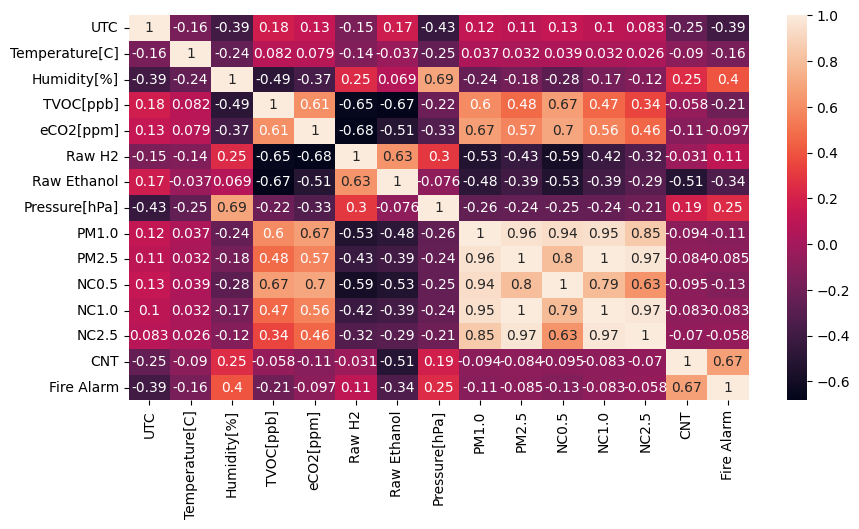

In [14]:
# Let's see the correlation matrix 
plt.figure(figsize = (10,5))
sns.heatmap(df_smoke.corr(),annot = True)
plt.show()

##### Remove unnecessary columns based on correlations

In [15]:
def highly_corr_columns(df: pd.DataFrame) -> list:
    # Assuming df is your dataframe with the features
    # Calculate the correlation matrix
    corr_matrix = df.corr().abs()

    # Set a threshold to determine high correlation
    threshold = 0.9

    # Create an upper triangle matrix to avoid redundant checks
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))

    # Find columns to drop (those with correlation greater than the threshold)
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    print(f"Dropped columns: {to_drop}")
    return to_drop

In [16]:
columns_to_drop = highly_corr_columns(df_smoke)

Dropped columns: ['PM2.5', 'NC0.5', 'NC1.0', 'NC2.5']


In [17]:
X_test = X_test.drop(columns=columns_to_drop)
X_train = X_train.drop(columns=columns_to_drop)

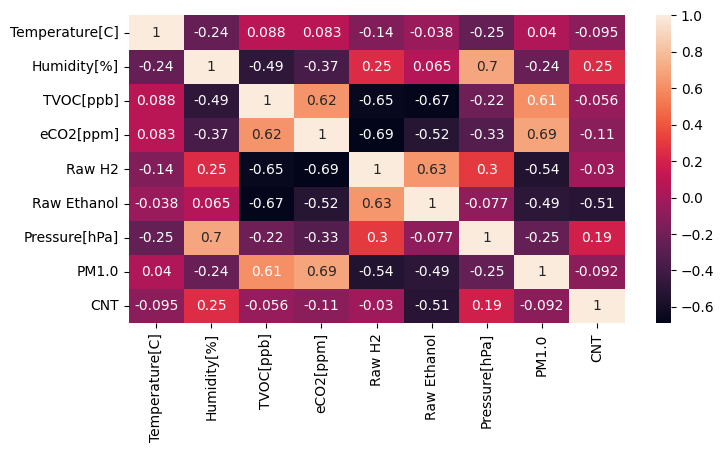

In [18]:
# Let's see the correlation matrix 
plt.figure(figsize = (8,4))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

## 7. Model building

In [19]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=42)

In [20]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=dt_classifier, n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

In [21]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

In [22]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Temperature[C]', np.True_, np.int64(1)),
 ('Humidity[%]', np.True_, np.int64(1)),
 ('TVOC[ppb]', np.True_, np.int64(1)),
 ('eCO2[ppm]', np.True_, np.int64(1)),
 ('Raw H2', np.True_, np.int64(1)),
 ('Raw Ethanol', np.True_, np.int64(1)),
 ('Pressure[hPa]', np.True_, np.int64(1)),
 ('PM1.0', np.True_, np.int64(1)),
 ('CNT', np.True_, np.int64(1))]

In [23]:
col = X_train.columns[rfe.support_]
col

Index(['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2',
       'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'CNT'],
      dtype='object')

In [24]:
X_train.columns[~rfe.support_]

Index([], dtype='object')

## 8. Feature selection using RFE

In [25]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [26]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg, n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

In [27]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

In [28]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Temperature[C]', np.True_, np.int64(1)),
 ('Humidity[%]', np.True_, np.int64(1)),
 ('TVOC[ppb]', np.True_, np.int64(1)),
 ('eCO2[ppm]', np.True_, np.int64(1)),
 ('Raw H2', np.True_, np.int64(1)),
 ('Raw Ethanol', np.True_, np.int64(1)),
 ('Pressure[hPa]', np.True_, np.int64(1)),
 ('PM1.0', np.True_, np.int64(1)),
 ('CNT', np.True_, np.int64(1))]

In [29]:
col = X_train.columns[rfe.support_]
col

Index(['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2',
       'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'CNT'],
      dtype='object')

In [30]:
X_train.columns[~rfe.support_]

Index([], dtype='object')

## 9. Assessing the model with sklearn

No need to recreate the model as we have no unsupported columns

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [32]:
dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_classifier.fit(X_train[col], y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [33]:
# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

### Visualization the first model

In [34]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz
from sklearn.tree import plot_tree

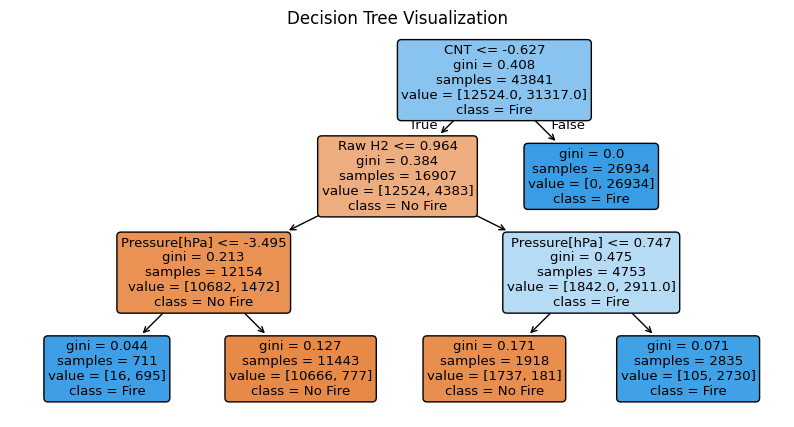

In [35]:
plt.figure(figsize=(10,5))
plot_tree(dt_classifier, feature_names=X_train.columns, class_names=['No Fire', 'Fire'], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

### Evaluate the first model

In [36]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [37]:
evaluate_model(dt_classifier)

Train Accuracy : 0.975388335120093
Train Confusion Matrix:
[[12403   121]
 [  958 30359]]
--------------------------------------------------
Test Accuracy : 0.9773803821384853
Test Confusion Matrix:
[[ 5311    38]
 [  387 13053]]


In [38]:
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5349
           1       1.00      0.97      0.98     13440

    accuracy                           0.98     18789
   macro avg       0.96      0.98      0.97     18789
weighted avg       0.98      0.98      0.98     18789



## 10. Hyper-parameter tuning

In [39]:
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier(random_state=42)

In [40]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [41]:
# Instantiate the grid search model
grid_search = GridSearchCV(
    estimator=dt, 
    param_grid=params, 
    cv=4, n_jobs=-1, verbose=1, scoring = "accuracy"
)

In [42]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
CPU times: total: 969 ms
Wall time: 26.5 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [43]:
dt_best = grid_search.best_estimator_

In [44]:
evaluate_model(dt_best)

Train Accuracy : 0.9999315709039484
Train Confusion Matrix:
[[12524     0]
 [    3 31314]]
--------------------------------------------------
Test Accuracy : 0.9999467773697376
Test Confusion Matrix:
[[ 5349     0]
 [    1 13439]]


In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, dt_best.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5349
           1       1.00      1.00      1.00     13440

    accuracy                           1.00     18789
   macro avg       1.00      1.00      1.00     18789
weighted avg       1.00      1.00      1.00     18789



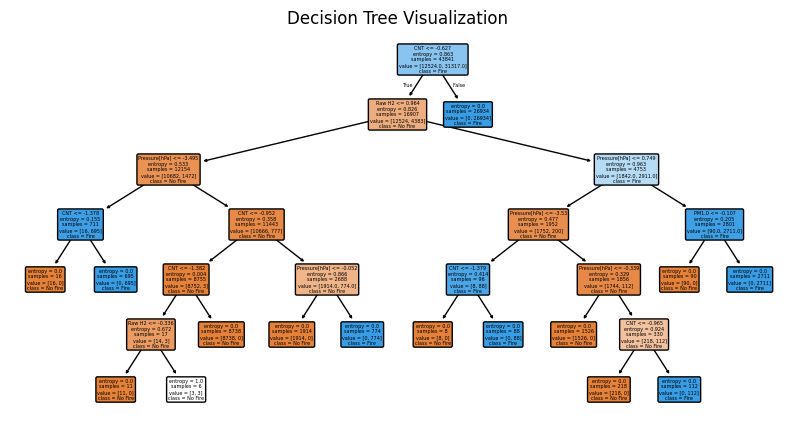

In [46]:
plt.figure(figsize=(10,5))
plot_tree(dt_best, feature_names=X_train.columns, class_names=['No Fire', 'Fire'], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

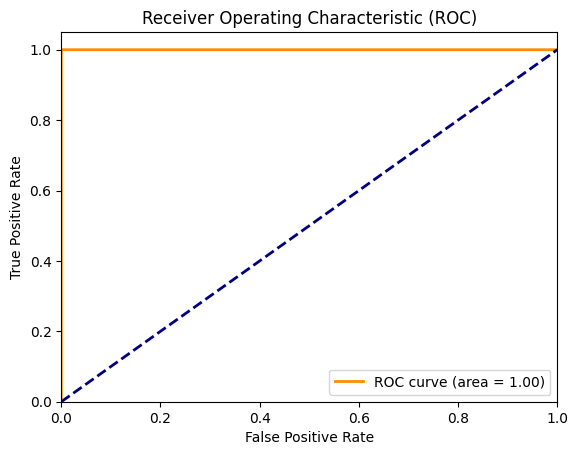

In [47]:
# Drawing the ROC curve for logistic regression using sklearn
def plot_roc_curve(X_test, y_test, model):
    import matplotlib.pyplot as plt
    from sklearn.metrics import roc_curve, auc
    
    # Get the predicted probabilities (for the positive class)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve and ROC area for each class
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
    # Plotting the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curve(X_test, y_test, dt_best)

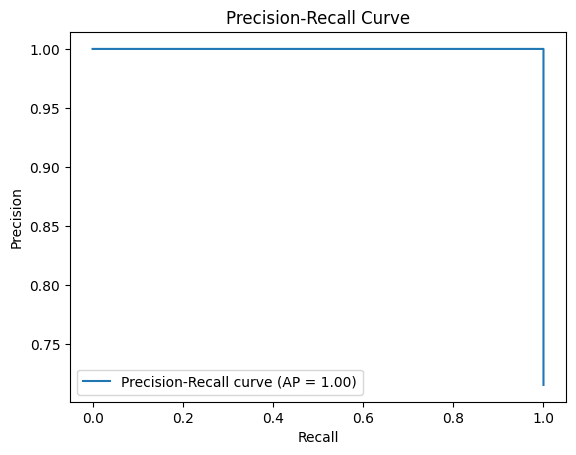

In [48]:
# Precision-Recall Curve
def plot_precision_recall_curve(X_test, y_test, model):
    import matplotlib.pyplot as plt
    from sklearn.metrics import precision_recall_curve, average_precision_score

    # Assuming y_test and y_pred_proba are defined
    # y_pred_proba is the predicted probabilities for the positive class (usually class 1)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
    average_precision = average_precision_score(y_test, y_pred_prob)
    
    # Plot the Precision-Recall curve
    plt.figure()
    plt.plot(recall, precision, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="best")
    plt.show()

plot_precision_recall_curve(X_test, y_test, dt_best)